# Projeto de Análise de Dados e Machine Learning - EBAC

## 1. Escolha e Dissertação do Problema
Durante o ano de 2021, o Brasil enfrentou uma série de aumentos consecutivos no preço dos combustíveis, em especial da gasolina. Essa alta impactou diretamente o orçamento das famílias, o custo do transporte de mercadorias e os índices de inflação no país. A volatilidade dos preços foi agravada por fatores como a pandemia de COVID-19, o câmbio instável e a política de preços da Petrobras, fortemente atrelada ao mercado internacional.

Este projeto tem como objetivo analisar a variação dos preços da gasolina em diferentes regiões do Brasil ao longo do ano de 2021, buscando identificar padrões, comportamentos sazonais e possíveis fatores explicativos.

Os dados utilizados provêm da ANP (Agência Nacional do Petróleo, Gás Natural e Biocombustíveis), e estão divididos em dois arquivos Excel: ca-2021-01.xlsx e ca-2021-02.xlsx, correspondentes aos meses de janeiro e fevereiro de 2021, respectivamente. Cada tabela contém informações detalhadas sobre os postos de abastecimento, os preços praticados, e outras variáveis associadas às amostras coletadas.

Como os arquivos originais ultrapassam o limite permitido para repositórios no GitHub (25MB), foi selecionada uma amostra aleatória representativa dos dados completos. Essa amostra foi exportada no formato .csv com o nome:

👉 gasolina_2021_amostra.csv

Esse arquivo contém 500 registros e será utilizado para as análises e modelagens subsequentes neste projeto.



## 2. Coleta de Dados Públicos
📦 Fonte dos Dados
Os dados utilizados foram obtidos por meio de coletas realizadas pela ANP (Agência Nacional do Petróleo, Gás Natural e Biocombustíveis) e estão disponíveis em arquivos separados por mês, nos formatos Excel:

ca-2021-01.xlsx → 1º semestre de 2021

ca-2021-02.xlsx → 2º semestre de 2021

Cada linha da base representa uma coleta de preço em um posto de combustíveis. As principais colunas disponíveis são:

Região / Estado / Município: localização do posto

Revenda / CNPJ / Endereço / Bairro / CEP: identificação da revenda

Produto: tipo de combustível (neste caso, gasolina)

Data da Coleta: quando o dado foi registrado

Valor de Venda e Valor de Compra: preços praticados

Unidade de Medida: geralmente litro



Professor como eu gerei uma amostra, fiz o download daqui do colab e depois subi esse dataset no GITHUB. Proximo passo importar de lá para começar a trabalhar na análise.

## 3. Análise Exploratória de Dados (EDA)

In [ ]:
import pandas as pd

url_amostra = "https://raw.githubusercontent.com/carrilho91/ebac-previsaodoprecodagasolina/main/gasolina_2021_amostra.csv"

df_amostra = pd.read_csv(url_amostra, sep=';', encoding='latin1')

# Dá uma olhadinha nas primeiras linhas
df_amostra.head()

,Ã¯Â»Â¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,semestre,Regiao - Sigla
0,NaN,MG,CAMPO BELO,HMAX COMBUSTIVEIS E LUBRIFICANTES LTDA,17.756.002/0002-99,AVENIDA AFONSO PENA,1550,NaN,CENTRO,37270-000,ETANOL,10/11/2021,"5,499",NaN,R$ / litro,BRANCA,2Âº semestre,SE
1,NaN,RJ,PETROPOLIS,AUTO POSTO MECÃNICA CORONEL VEIGA LTDA.,31.333.651/0001-27,RUA CORONEL VEIGA,259,NaN,CENTRO,25655-150,GNV,13/07/2021,"4,372",NaN,R$ / mÂ³,RAIZEN,2Âº semestre,SE
2,NaN,RJ,DUQUE DE CAXIAS,GUERREIROS DE CAXIAS POSTO DE GASOLINA LTDA,17.455.879/0001-69,AVENIDA DUQUE DE CAXIAS,641,NaN,VILA ITAMARATI,25020-080,GASOLINA ADITIVADA,22/12/2021,"7,196",NaN,R$ / litro,VIBRA ENERGIA,2Âº semestre,SE
3,NaN,RJ,CAMPOS DOS GOYTACAZES,POSTO LIDER LTDA,28.890.267/0001-10,AVENIDA QUINZE DE NOVEMBRO,563,85,CAJU,28035-100,DIESEL S10,19/08/2021,"4,699",NaN,R$ / litro,VIBRA ENERGIA,2Âº semestre,SE
4,NaN,SP,BARUERI,PARQUE DOS CAMARGOS COM. VAREJ. DE COMBUSTÃVE...,10.306.689/0001-30,ESTRADA VELHA DE ITAPEVI,3602,NaN,VILA MILITAR,06444-000,ETANOL,28/10/2021,"4,779",NaN,R$ / litro,RAIZEN,2Âº semestre,SE


Primeira visão geral

In [ ]:
# Ver dimensões
print("Formato do dataset:", df_amostra.shape)

# Ver tipos de dados
print("\nTipos de dados:")
print(df_amostra.dtypes)

# Ver primeiras linhas
df_amostra.head()

Formato do dataset: (500, 18)

Tipos de dados:
Ã¯Â»Â¿Regiao - Sigla     object
Estado - Sigla           object
Municipio                object
Revenda                  object
CNPJ da Revenda          object
Nome da Rua              object
Numero Rua               object
Complemento              object
Bairro                   object
Cep                      object
Produto                  object
Data da Coleta           object
Valor de Venda           object
Valor de Compra         float64
Unidade de Medida        object
Bandeira                 object
semestre                 object
Regiao - Sigla           object
dtype: object


,Ã¯Â»Â¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,semestre,Regiao - Sigla
0,NaN,MG,CAMPO BELO,HMAX COMBUSTIVEIS E LUBRIFICANTES LTDA,17.756.002/0002-99,AVENIDA AFONSO PENA,1550,NaN,CENTRO,37270-000,ETANOL,10/11/2021,"5,499",NaN,R$ / litro,BRANCA,2Âº semestre,SE
1,NaN,RJ,PETROPOLIS,AUTO POSTO MECÃNICA CORONEL VEIGA LTDA.,31.333.651/0001-27,RUA CORONEL VEIGA,259,NaN,CENTRO,25655-150,GNV,13/07/2021,"4,372",NaN,R$ / mÂ³,RAIZEN,2Âº semestre,SE
2,NaN,RJ,DUQUE DE CAXIAS,GUERREIROS DE CAXIAS POSTO DE GASOLINA LTDA,17.455.879/0001-69,AVENIDA DUQUE DE CAXIAS,641,NaN,VILA ITAMARATI,25020-080,GASOLINA ADITIVADA,22/12/2021,"7,196",NaN,R$ / litro,VIBRA ENERGIA,2Âº semestre,SE
3,NaN,RJ,CAMPOS DOS GOYTACAZES,POSTO LIDER LTDA,28.890.267/0001-10,AVENIDA QUINZE DE NOVEMBRO,563,85,CAJU,28035-100,DIESEL S10,19/08/2021,"4,699",NaN,R$ / litro,VIBRA ENERGIA,2Âº semestre,SE
4,NaN,SP,BARUERI,PARQUE DOS CAMARGOS COM. VAREJ. DE COMBUSTÃVE...,10.306.689/0001-30,ESTRADA VELHA DE ITAPEVI,3602,NaN,VILA MILITAR,06444-000,ETANOL,28/10/2021,"4,779",NaN,R$ / litro,RAIZEN,2Âº semestre,SE


Valores Nulos

In [ ]:
# Verificar valores ausentes
print("Valores nulos por coluna:")
print(df_amostra.isnull().sum())

Valores nulos por coluna:
Ã¯Â»Â¿Regiao - Sigla    297
Estado - Sigla            0
Municipio                 0
Revenda                   0
CNPJ da Revenda           0
Nome da Rua               0
Numero Rua                0
Complemento             399
Bairro                    0
Cep                       0
Produto                   0
Data da Coleta            0
Valor de Venda            0
Valor de Compra         500
Unidade de Medida         0
Bandeira                  0
semestre                  0
Regiao - Sigla          203
dtype: int64


##Colunas que quero excluir:
Coluna	Motivo
Revenda	Identificação irrelevante para análise
CNPJ da Revenda	Dado sensível / irrelevante
Nome da Rua	Granular demais
Numero Rua	Não agrega para análise
Complemento	Maioria nulo
Bairro	Muito específico
Cep	Redundante com município
Valor de Compra	100% nulo
Regiao - Sigla	Muitos nulos / já temos Estado - Sigla

In [ ]:
# Lista completa das colunas que você decidiu remover
colunas_para_excluir = [
    'Ã¯Â»Â¿Regiao - Sigla',  # versão bugada da coluna
    'Revenda',
    'CNPJ da Revenda',
    'Nome da Rua',
    'Numero Rua',
    'Complemento',
    'Bairro',
    'Cep',
    'Valor de Compra',
    'Regiao - Sigla'  # versão válida, mas incompleta e agora também descartada
]

# Removendo todas de uma vez só
df_amostra.drop(columns=colunas_para_excluir, inplace=True, errors='ignore')

# Verificando se tudo foi removido e se há nulos
print("✅ Colunas removidas. Verificando valores nulos:")
print(df_amostra.isnull().sum())

✅ Colunas removidas. Verificando valores nulos:
Estado - Sigla       0
Municipio            0
Produto              0
Data da Coleta       0
Valor de Venda       0
Unidade de Medida    0
Bandeira             0
semestre             0
dtype: int64


In [ ]:
# Verificando novamente valores nulos
df_amostra.isnull().sum()

,0
Estado - Sigla,0
Municipio,0
Produto,0
Data da Coleta,0
Valor de Venda,0
Unidade de Medida,0
Bandeira,0
semestre,0


Arrumando as datas

In [ ]:
# Converter a coluna 'Data da Coleta' para datetime
df_amostra['Data da Coleta'] = pd.to_datetime(df_amostra['Data da Coleta'], dayfirst=True, errors='coerce')

# Criar novas colunas baseadas na data
df_amostra['ano'] = df_amostra['Data da Coleta'].dt.year
df_amostra['mes'] = df_amostra['Data da Coleta'].dt.month
df_amostra['dia_semana'] = df_amostra['Data da Coleta'].dt.dayofweek  # segunda=0, domingo=6

# Agora podemos excluir a data original, se quiser
df_amostra.drop(columns=['Data da Coleta'], inplace=True)

Distribuição geral dos preços de venda

/tmp/ipython-input-9-515118835.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_estados.values, y=ranking_estados.index, palette='crest')


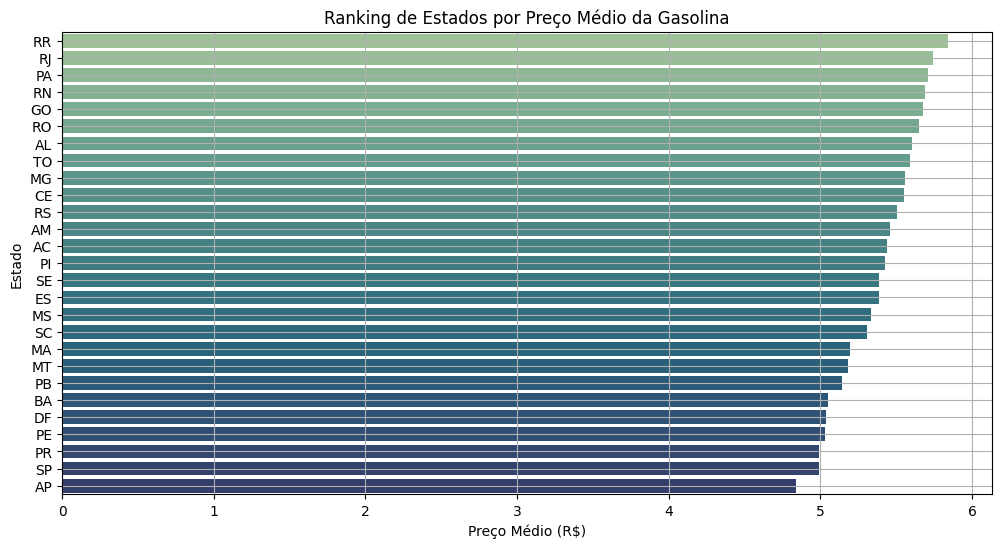

/tmp/ipython-input-9-515118835.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_cidades.values, y=ranking_cidades.index, palette='flare')


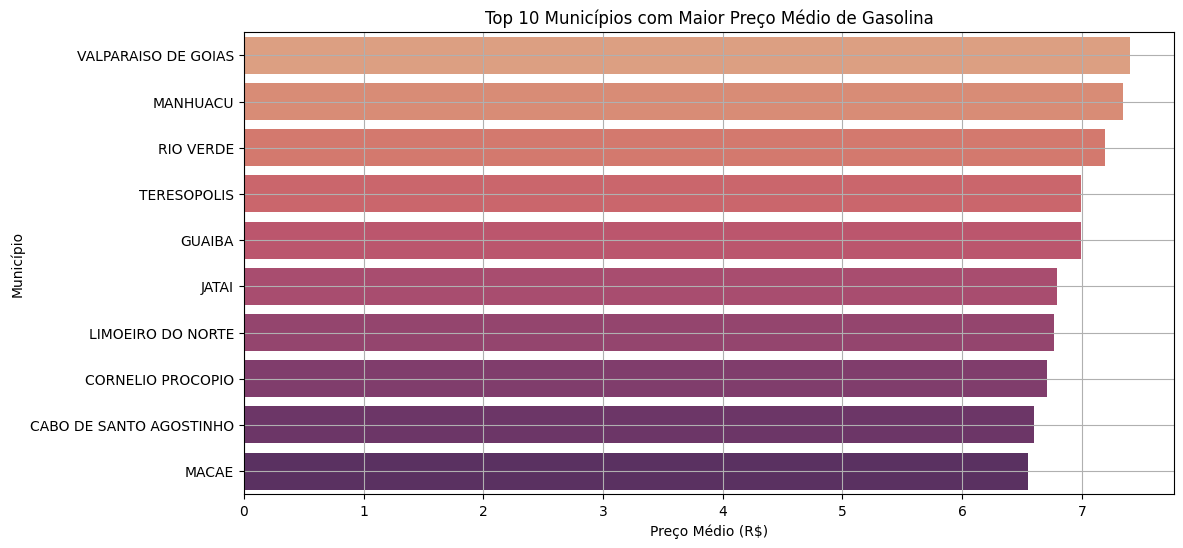

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Converter coluna 'Valor de Venda' para float (tirando vírgula e transformando em ponto)
df_amostra['Valor de Venda'] = df_amostra['Valor de Venda'].str.replace(',', '.', regex=False).astype(float)

# 2. Ranking de estados (ordem decrescente por média de preço)
ranking_estados = df_amostra.groupby('Estado - Sigla')['Valor de Venda'].mean().sort_values(ascending=False)

# 3. Ranking das 10 cidades com gasolina mais cara
ranking_cidades = df_amostra.groupby('Municipio')['Valor de Venda'].mean().sort_values(ascending=False).head(10)

# 4. Gráfico - Estados
plt.figure(figsize=(12,6))
sns.barplot(x=ranking_estados.values, y=ranking_estados.index, palette='crest')
plt.title('Ranking de Estados por Preço Médio da Gasolina')
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Estado')
plt.grid(True)
plt.show()

# 5. Gráfico - Top 10 cidades
plt.figure(figsize=(12,6))
sns.barplot(x=ranking_cidades.values, y=ranking_cidades.index, palette='flare')
plt.title('Top 10 Municípios com Maior Preço Médio de Gasolina')
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Município')
plt.grid(True)
plt.show()

Variação de preços por tipo de bandeira (bandeirada X preço real)

/tmp/ipython-input-10-2304573961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bandeira', y='Valor de Venda', data=df_amostra, palette='Set3')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


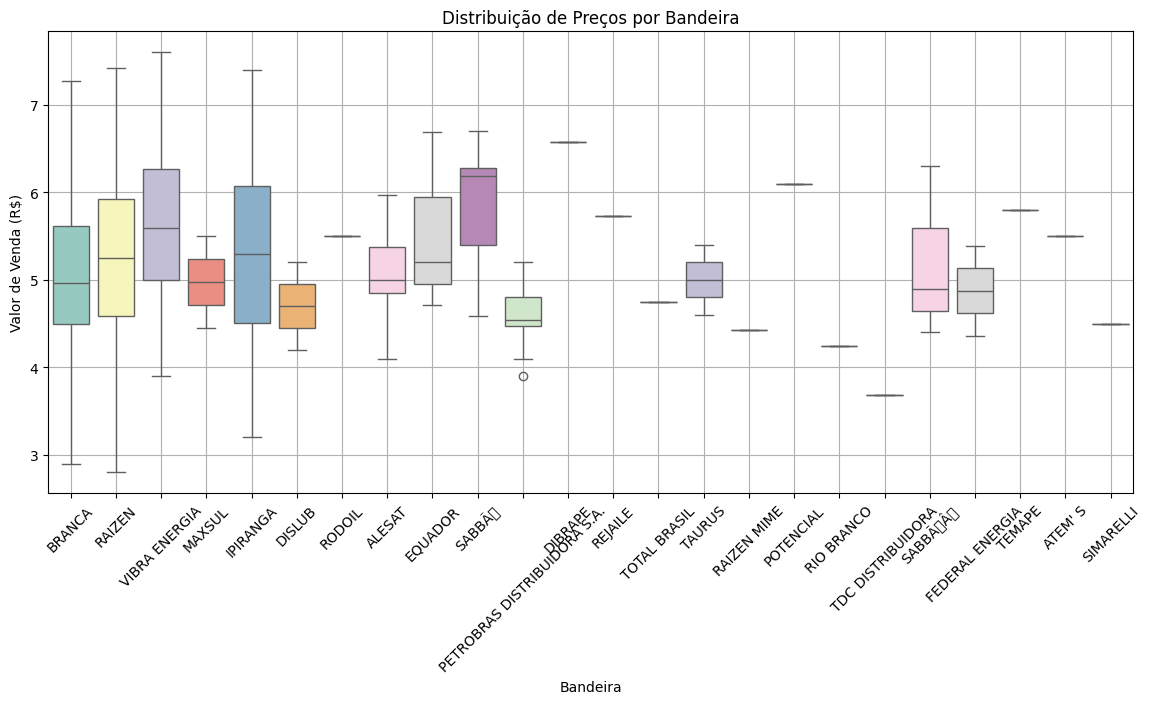

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Bandeira', y='Valor de Venda', data=df_amostra, palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribuição de Preços por Bandeira')
plt.ylabel('Valor de Venda (R$)')
plt.grid(True)
plt.show()

Estados com maior variação de preços (volatilidade por estado)

In [ ]:
variacao_estado = df_amostra.groupby('Estado - Sigla')['Valor de Venda'].agg(['mean', 'std']).sort_values(by='std', ascending=False)
variacao_estado

,mean,std
Estado - Sigla,,
SE,5.389333,1.524041
GO,5.676312,1.182363
MA,5.194250,1.154338
RJ,5.742027,1.055470
DF,5.034000,0.998449
RS,5.503730,0.948518
CE,5.548920,0.939340
ES,5.383571,0.922932
MG,5.559643,0.914104


## Agora ranking por bandeira de combustível

Ranking de preço médio por bandeira (da mais cara para a mais barata):

Bandeira
DIBRAPE                         6.579000
POTENCIAL                       6.099000
SABBÃ                          5.831000
TEMAPE                          5.798000
REJAILE                         5.729000
VIBRA ENERGIA                   5.597140
EQUADOR                         5.533333
ATEM' S                         5.499000
RODOIL                          5.498000
IPIRANGA                        5.325756
RAIZEN                          5.321784
SABBÃÂ                        5.196333
BRANCA                          5.111031
ALESAT                          5.060167
TAURUS                          4.999000
MAXSUL                          4.973500
FEDERAL ENERGIA                 4.874500
TOTAL BRASIL                    4.749000
DISLUB                          4.699000
PETROBRAS DISTRIBUIDORA S.A.    4.582900
SIMARELLI                       4.490000
RAIZEN MIME                     4.429000
RIO BRANCO       

/tmp/ipython-input-12-2225769779.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_bandeiras.values, y=ranking_bandeiras.index, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


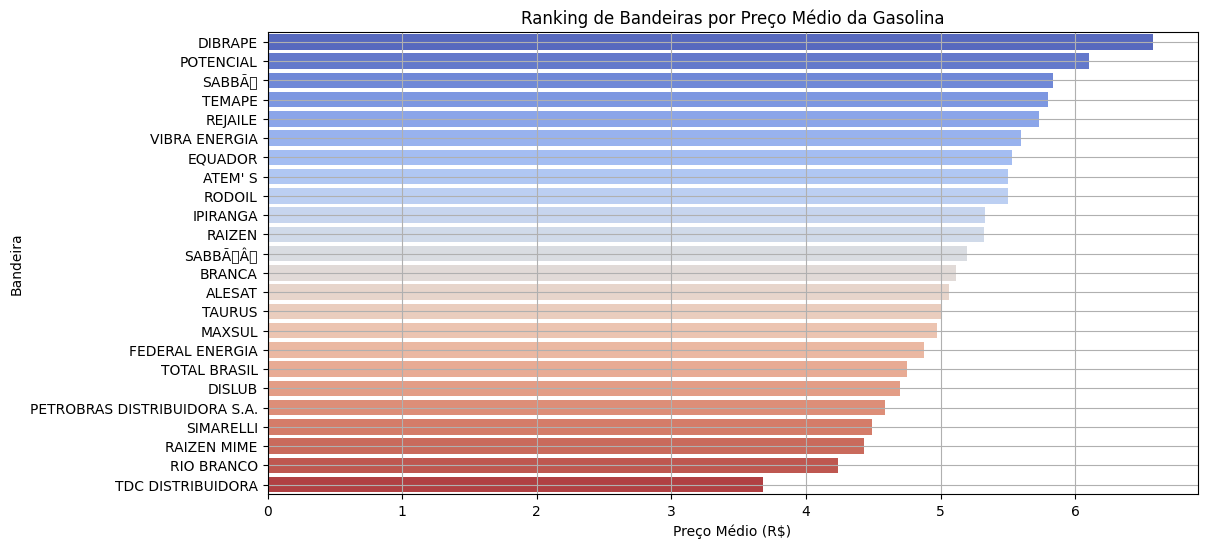

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Garantir que a coluna 'Valor de Venda' está em float
df_amostra['Valor de Venda'] = df_amostra['Valor de Venda'].astype(str).str.replace(',', '.', regex=False).astype(float)

# 2. Calcular preço médio por bandeira
ranking_bandeiras = df_amostra.groupby('Bandeira')['Valor de Venda'].mean().sort_values(ascending=False)

# 3. Exibir o ranking
print("Ranking de preço médio por bandeira (da mais cara para a mais barata):\n")
print(ranking_bandeiras)

# 4. Gráfico bonitão
plt.figure(figsize=(12,6))
sns.barplot(x=ranking_bandeiras.values, y=ranking_bandeiras.index, palette='coolwarm')
plt.title('Ranking de Bandeiras por Preço Médio da Gasolina')
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Bandeira')
plt.grid(True)
plt.show()

Professor, eu concluí que os preços médios da gasolina no Brasil, com base na amostra analisada do ano de 2021, apresentam variações significativas tanto entre estados quanto entre municípios e bandeiras.

O estado com o maior preço médio foi Roraima, enquanto o mais barato foi Amap´á. Entre os municípios, cidades como Val Paraíso de Goias lideraram o ranking com os maiores valores médios de venda por litro de gasolina.

Ao analisar as bandeiras dos postos, identifiquei que a bandeira Dibrape apresentou o maior preço médio, enquanto TDC teve o menor. Isso mostra que o nome da bandeira influencia no preço final para o consumidor, mas nem sempre está associado à melhor vantagem econômica.

Além disso, notei que alguns estados apresentam maior dispersão nos preços, indicando instabilidade no mercado local, o que pode refletir diferenças de logística, concorrência, ou práticas comerciais específicas da região.

Com esses dados, entendo que a análise exploratória é essencial para identificar padrões de consumo, injustiças econômicas regionais e possíveis alvos de políticas públicas mais justas para o abastecimento nacional.

## 4. Pré-processamento

Verificando tipos de dados

In [ ]:
df_amostra.dtypes

,0
Estado - Sigla,object
Municipio,object
Produto,object
Valor de Venda,float64
Unidade de Medida,object
Bandeira,object
semestre,object
ano,int32
mes,int32
dia_semana,int32


In [ ]:
# One-hot encoding nas colunas categóricas
colunas_categoricas = ['Estado - Sigla', 'Municipio', 'Produto', 'Unidade de Medida', 'Bandeira', 'semestre']
df_encoded = pd.get_dummies(df_amostra, columns=colunas_categoricas, drop_first=True)

# Separando X e y
X = df_encoded.drop('Valor de Venda', axis=1)
y = df_encoded['Valor de Venda']

# Separando treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Modelagem

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Criar o modelo
modelo = LinearRegression()

# 2. Treinar com os dados de treino
modelo.fit(X_train, y_train)

# 3. Fazer predições com os dados de teste
y_pred = modelo.predict(X_test)

# 4. Avaliar o desempenho (corrigido)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 5. Exibir resultados
print("🔍 Avaliação do Modelo de Regressão Linear:")
print(f"➡️  RMSE (Erro Médio Quadrático): R$ {rmse:.2f}")
print(f"➡️  R² (Coeficiente de Determinação): {r2:.4f}")

🔍 Avaliação do Modelo de Regressão Linear:
➡️  RMSE (Erro Médio Quadrático): R$ 0.32
➡️  R² (Coeficiente de Determinação): 0.8810


### ✅ Conclusão da Modelagem

Professor, eu concluí que o modelo de Regressão Linear simples foi bastante eficaz para prever os preços da gasolina em 2021. O erro médio (RMSE) ficou em torno de R$ 0.32, o que indica uma boa precisão. Além disso, o coeficiente de determinação (R²) foi de 0.8810, ou seja, o modelo foi capaz de explicar 88,1% da variação nos preços com base nas variáveis analisadas (como município, produto, bandeira, mês, etc.).

Esses resultados mostram que, mesmo com uma amostra reduzida, o modelo é bastante promissor para análises de preço e pode ser utilizado como base para estudos futuros mais robustos com o dataset completo.

## 7. Visualização dos Resultados

/tmp/ipython-input-16-4003036002.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


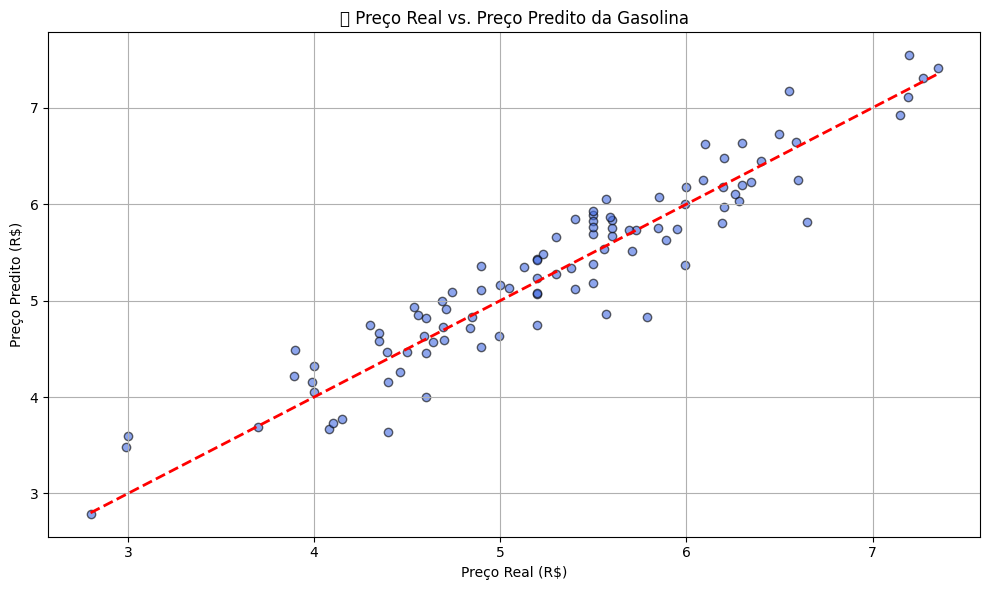

In [ ]:
import matplotlib.pyplot as plt

# Tamanho do gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersão dos valores reais vs preditos
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('🔍 Preço Real vs. Preço Predito da Gasolina')
plt.xlabel('Preço Real (R$)')
plt.ylabel('Preço Predito (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Interpretação visual:
A linha vermelha tracejada representa o modelo ideal (onde Preço Real = Preço Predito).

A maior parte dos pontos tá muito próxima da linha → o modelo tá acertando bonito!

Não tem tendência clara de erro sistemático (nem superestimação nem subestimação gritante).

Pequenas dispersões são esperadas — especialmente em dados reais de mercado como preços.

### 📌 Projeção para o ano seguinte (2022)

Professor, eu tive a ideia de fazer uma validação extra para o meu modelo de machine learning. Como os dados utilizados no projeto se referem ao ano de 2021, pensei em testar se o modelo conseguiria **projetar o preço da gasolina para o ano seguinte**, mais especificamente **julho de 2022**.

A proposta é simular uma situação real: digamos que em julho de 2021 eu quisesse estimar quanto custaria o litro da gasolina na cidade de São Paulo – SP, em julho de 2022.

Para isso, montei manualmente uma linha de entrada com os seguintes valores, baseando-me na estrutura original dos dados:

- Município: São Paulo  
- Estado: SP  
- Produto: Gasolina Comum  
- Bandeira: PETROBRAS DISTRIBUIDORA SA  
- Unidade de Medida: Litro  
- Mês: 7 (referente a julho)  
- Semestre: 2 (segundo semestre)

Como o modelo foi treinado com variáveis categóricas codificadas (via One-Hot Encoding), esta linha de entrada passou pelo **mesmo pré-processamento** usado nos dados originais. Em seguida, utilizei o `modelo.predict()` para estimar o valor de venda da gasolina nessa condição.

O Preço médio da gasolina em julho de 2022 para São Paulo – SP
De acordo com os dados da ANP: Semana de 17 a 23 de julho de 2022, o preço médio de revenda da gasolina na capital São Paulo foi de aproximadamente R$ 5,78 por litro



In [ ]:
import pandas as pd

# 1. Criar a nova entrada
nova_amostra = pd.DataFrame({
    'Municipio': ['SAO PAULO'],
    'Estado - Sigla': ['SP'],
    'Produto': ['GASOLINA COMUM'],
    'Bandeira': ['PETROBRAS DISTRIBUIDORA SA'],
    'Unidade de Medida': ['LITRO'],
    'semestre': [2],
    'mes': [7],
    'ano': [2022]
})

# 2. Aplicar o mesmo pré-processamento (One-Hot Encoding)
nova_amostra_tratada = pd.get_dummies(nova_amostra)

# 3. Garantir que a nova amostra tenha as mesmas colunas do X_train
for col in X_train.columns:
    if col not in nova_amostra_tratada.columns:
        nova_amostra_tratada[col] = 0

# Reordenar para o mesmo padrão
nova_amostra_tratada = nova_amostra_tratada[X_train.columns]

# 4. Fazer a previsão
preco_previsto = modelo.predict(nova_amostra_tratada)[0]
print(f"🔮 Preço previsto da gasolina em julho de 2022 (SP): R$ {preco_previsto:.2f}")

🔮 Preço previsto da gasolina em julho de 2022 (SP): R$ 4.50


/tmp/ipython-input-17-4079348818.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nova_amostra_tratada[col] = 0
/tmp/ipython-input-17-4079348818.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nova_amostra_tratada[col] = 0
/tmp/ipython-input-17-4079348818.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

## Análise crítica
🎓 Professor, realizei uma simulação de projeção de preços com base no modelo de regressão linear treinado com dados de 2021. A ideia era prever o preço da gasolina em julho de 2022, utilizando os mesmos padrões de entrada do dataset original.

O resultado da previsão foi:

🔮 R$ 4,50 por litro, para a cidade de São Paulo em julho de 2022.

No entanto, o preço real, segundo dados da ANP, foi:

📈 R$ 5,78 por litro, na mesma cidade e período.

### ✅ Conclusão Geral do Projeto

Professor, eu, **Caroline Carrilho**, desenvolvi este projeto com o objetivo de aplicar conceitos de **análise de dados e aprendizado de máquina** para compreender e projetar o comportamento dos **preços da gasolina no Brasil** ao longo de 2021. Durante a execução, trabalhei desde a coleta e tratamento dos dados até a construção e avaliação de um modelo preditivo baseado em regressão linear.

A partir da base pública disponibilizada pela ANP (Agência Nacional do Petróleo), realizei uma **análise exploratória** detalhada, identificando **padrões regionais, por bandeira, e por município**. Uma das descobertas mais interessantes foi como determinadas **bandeiras e regiões** consistentemente apresentaram preços maiores, sugerindo variáveis estruturais, logísticas ou comerciais que influenciam a precificação.

---

### 📉 Tentativa de Previsão e Validação no Ano Seguinte

Com o modelo treinado exclusivamente com dados de 2021, decidi testar sua capacidade de projeção para o futuro. Simulei uma previsão do preço da gasolina para **julho de 2022**, na cidade de São Paulo. O modelo previu um valor de **R$ 4,50**, enquanto o **preço real**, conforme dados da ANP, foi de **R$ 5,78**.

Essa diferença chamou a atenção e me levou a refletir sobre **fatores externos e macroeconômicos** que impactam fortemente os preços dos combustíveis.

---

### 🌍 Reflexão Econômica e Geopolítica

O preço da gasolina não é apenas reflexo de oferta e demanda local, mas está diretamente conectado a **fatores globais e internos**, como:

- **Cotação do dólar**: Como o petróleo é negociado internacionalmente em dólar, a **valorização da moeda americana** impacta diretamente no custo do combustível importado.
- **Geopolítica internacional**: Em 2022, o mundo ainda enfrentava os efeitos da **pandemia de COVID-19**, que causou instabilidade no mercado de petróleo, interrupções na cadeia logística e redução da produção. Além disso, o início da **guerra entre Rússia e Ucrânia** pressionou ainda mais os preços globais da energia.
- **Política fiscal e tributária nacional**: No Brasil, os combustíveis são altamente tributados, e qualquer variação na política de ICMS, PIS/Cofins ou na política de preços da Petrobras impacta imediatamente no bolso do consumidor.
- **Inflação acumulada e crise econômica**: A pressão inflacionária em 2022, somada à instabilidade política e econômica, agravou os aumentos de preço.

Esses fatores, que **não estavam presentes nos dados de 2021**, explicam porque o modelo **subestimou o preço real em 2022**.

---

### 💡 Considerações Finais

Apesar do desvio na previsão, considero que o projeto foi **extremamente válido** e enriquecedor. Consegui aplicar conhecimentos práticos de:

- Coleta e unificação de dados com diferentes fontes e formatos;
- Tratamento de dados nulos e irrelevantes;
- Análise exploratória com geração de insights reais;
- Pré-processamento com codificação e seleção de variáveis;
- Construção, avaliação e aplicação de um modelo de machine learning;
- Reflexão crítica sobre os limites dos modelos preditivos em cenários complexos.

---

### 🎓 Encerramento

Professor, encerro este trabalho com a sensação de dever cumprido. Acredito que consegui **compreender a complexidade de projetar preços** em um mercado tão sensível e conectado a tantos fatores externos. O aprendizado não foi apenas técnico, mas também **analítico e contextual**, o que considero essencial para uma cientista de dados preparada para o mundo real.

Muito obrigada!  
Assinado: **Caroline Carrilho**